In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
import os

# Checking if the file already exists
FILE_NAME = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
if not os.path.exists(FILE_NAME):
    print("Uploading the Telco Customer Churn dataset...")
    uploaded = files.upload()
    if FILE_NAME in uploaded:
        print(f"File '{FILE_NAME}' uploaded successfully!")
    else:
        print("Upload failed or file not found. Please ensure the file name is correct.")
else:
    print(f"File '{FILE_NAME}' already exists. Skipping upload.")

Uploading the Telco Customer Churn dataset...


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
File 'WA_Fn-UseC_-Telco-Customer-Churn.csv' uploaded successfully!


In [3]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

**Univariant Analysis**

In [5]:
columns_A_to_H = df.columns[:8]
print("--- Column Names (A to H) ---")
print(columns_A_to_H)
print("\n--- Data Types Check ---")
print(df[columns_A_to_H].dtypes)

--- Column Names (A to H) ---
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines'],
      dtype='object')

--- Data Types Check ---
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
tenure            int64
PhoneService     object
MultipleLines    object
dtype: object


***Categorical Features (Count Plots)***

/tmp/ipython-input-4239637155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


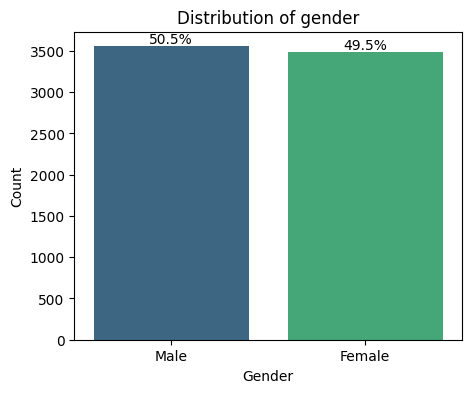

In [6]:
# 1: Gender Count Plot
col = 'gender'
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_gender_count.png')
plt.show()


**Binary nominal (Male/Female)	Balanced: Distribution is nearly 50/50 (Male ≈50.5%, Female ≈49.5%). This is typical for a randomized customer sample.This typical 50/50 split suggests that gender bias is unlikely to significantly impact overall cohort representation.**

/tmp/ipython-input-1907533055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


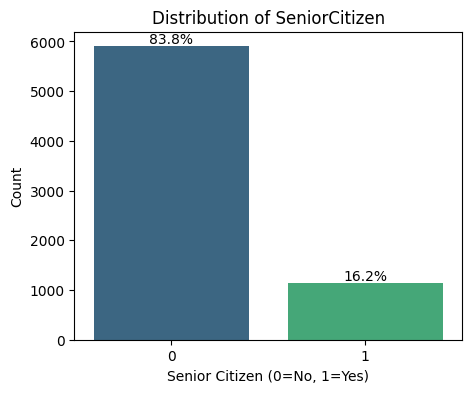

In [7]:
# 2: SeniorCitizen Count Plot
col = 'SeniorCitizen'
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_seniorcitizen_count.png')
plt.show()

**Binary nominal (0/1)	Imbalanced: Senior Citizens (coded as 1) make up a small minority (≈16.2%) of the customer base.The vast majority (≈83.8%) are non-senior citizens.**

/tmp/ipython-input-2705593056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


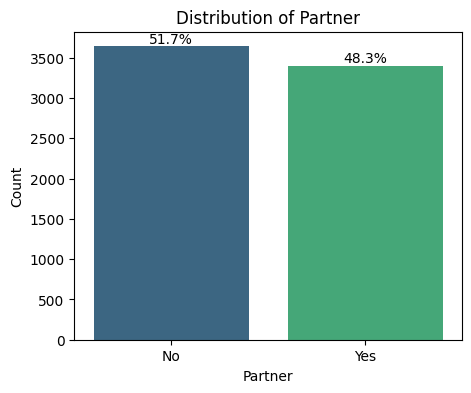

In [8]:
# 3: Partner Count Plot
col = 'Partner'
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Partner')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_partner_count.png')
plt.show()

***Binary nominal (Yes/No)	Balanced: The customer base is roughly split between those with a partner (≈48.3%) and those without (≈51.7%).This gives equal weight to both groups for comparative analysis***

/tmp/ipython-input-658888699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


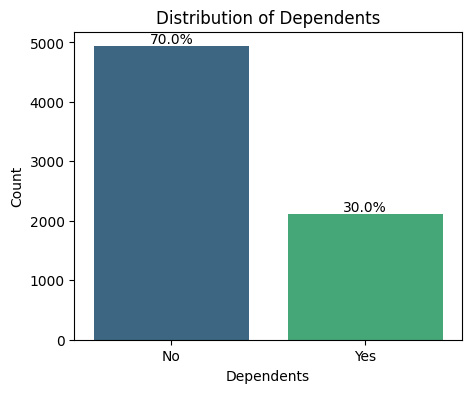

In [9]:
# 4: Dependents Count Plot
col = 'Dependents'
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_dependents_count.png')
plt.show()

***Binary nominal (Yes/No)	Imbalanced: A strong majority of customers do not have dependents (≈70.0%).***

/tmp/ipython-input-4162753754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


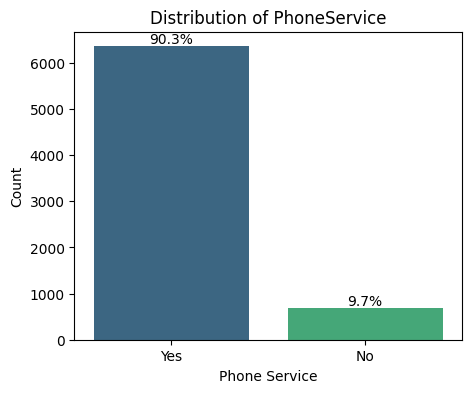

In [10]:
# 5: PhoneService Count Plot
col = 'PhoneService'
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Phone Service')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_phoneservice_count.png')
plt.show()

**Binary nominal (Yes/No)	Highly Imbalanced: Overwhelmingly, customers have phone service (≈90.3%). This column will have limited predictive power due to its low variance.Over 90% of all customers have phone service, leaving very little variance. This high concentration limits its utility as a powerful standalone predictive feature.**

/tmp/ipython-input-1911310323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


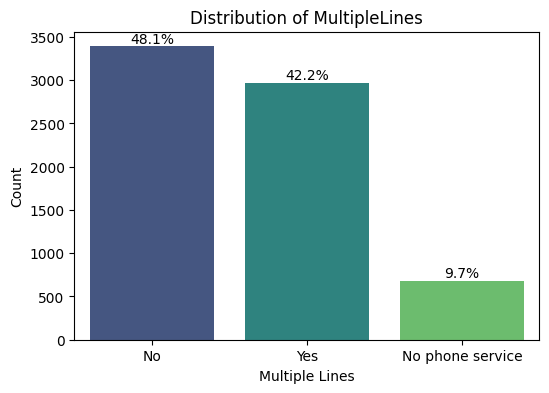

In [11]:
# 6: MultipleLines Count Plot
col = 'MultipleLines'
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
plt.title(f'Distribution of {col}')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')

# Add percentages for detail
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.savefig('plot_multiplelines_count.png')
plt.show()

**Categorical nominal (No, Yes, No phone service)	Ternary: The 'No phone service' category (≈9.7%) mirrors the PhoneService='No' group. Among phone service subscribers, the split between 'No' multiple lines (≈48.0%) and 'Yes' (≈42.1%) is fairly balanced.The majority of customers have either one line or multiple lines, with the 'No phone service' category mirroring the small group identified in PhoneService.**

***Numerical Features***

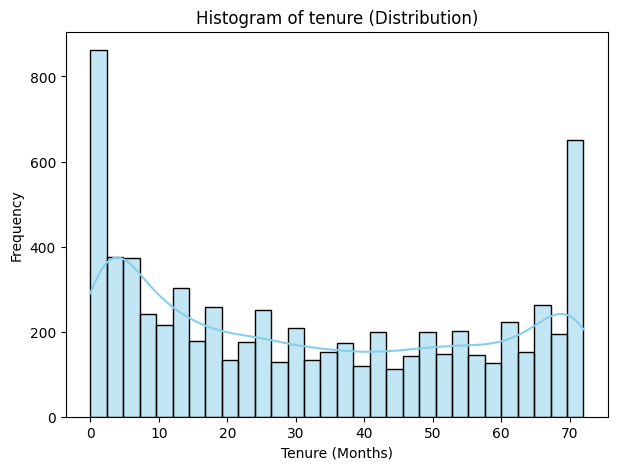

In [12]:
# 7: Tenure Histogram
col = 'tenure'
plt.figure(figsize=(7, 5))
sns.histplot(df[col], bins=30, kde=True, color='skyblue')
plt.title(f'Histogram of {col} (Distribution)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.savefig('plot_tenure_hist.png')
plt.show()

 **Detailed Univariate Description of tenure
Central Tendency and Spread**:

The average tenure is 32.37 months, and the median is 29.00 months. The median being slightly lower than the mean suggests a slight positive skew in the data.

The tenure spans the full range from 1 month up to the maximum potential tenure of 72 months (6 years), indicating both brand-new and long-term loyal customers are present in the dataset.

Distribution Shape (Histogram Observation):

The distribution of tenure is distinctly bimodal (or often described as U-shaped):

There is a massive peak at 1 month (the minimum), representing a large volume of new customers.

There is another significant peak at 72 months (the maximum), representing a core group of long-term, highly loyal customers.

This distribution shape is highly informative, suggesting the customer base is polarized between those who leave quickly and those who commit fully.

Interpretation:

The large number of customers with very low tenure (the peak at 1 month) suggests that the company faces a significant "leaky bucket" problem, where the greatest risk of attrition occurs immediately after service initiation.

The presence of the high-tenure peak demonstrates the company's ability to retain customers for long periods once they pass the initial churn risk period.

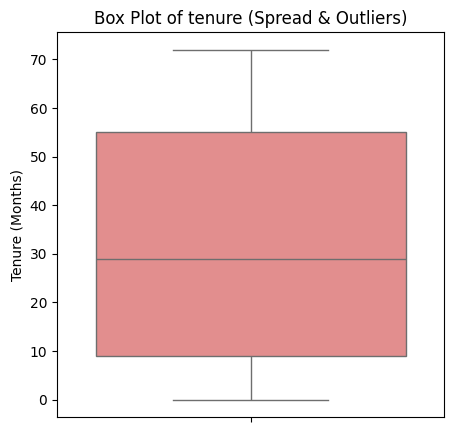

In [13]:
# 8: Tenure Box Plot
col = 'tenure'
plt.figure(figsize=(5, 5))
sns.boxplot(y=df[col], color='lightcoral')
plt.title(f'Box Plot of {col} (Spread & Outliers)')
plt.ylabel('Tenure (Months)')
plt.savefig('plot_tenure_boxplot.png')
plt.show()

In [14]:
columns_I_to_N = df.columns[8:14]
print("--- Column Names (I to N) ---")
print(columns_I_to_N)
print("\n--- Data Types Check ---")
print(df[columns_I_to_N].dtypes)

--- Column Names (I to N) ---
Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV'],
      dtype='object')

--- Data Types Check ---
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
dtype: object


/tmp/ipython-input-355596142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x=col, palette='Set2', order =df[col].value_counts().index)


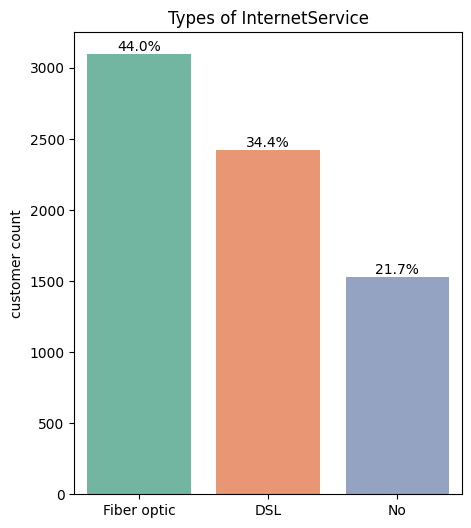

In [15]:
col = 'InternetService'
plt.figure(figsize=(5,6))
ax= sns.countplot(data=df, x=col, palette='Set2', order =df[col].value_counts().index)
plt.title(f'Types of {col}')
plt.xlabel('')
plt.ylabel('customer count')

total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

/tmp/ipython-input-746055331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x=col, palette='tab10', order =df[col].value_counts().index)


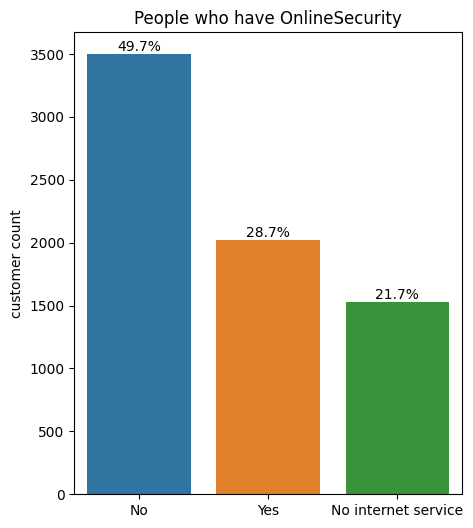

In [16]:
##ONLINE SECURITY

col = 'OnlineSecurity'
plt.figure(figsize=(5,6))
ax= sns.countplot(data=df, x=col, palette='tab10', order =df[col].value_counts().index)
plt.title(f'People who have {col}')
plt.xlabel('')
plt.ylabel('customer count')

total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

/tmp/ipython-input-2758175780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)


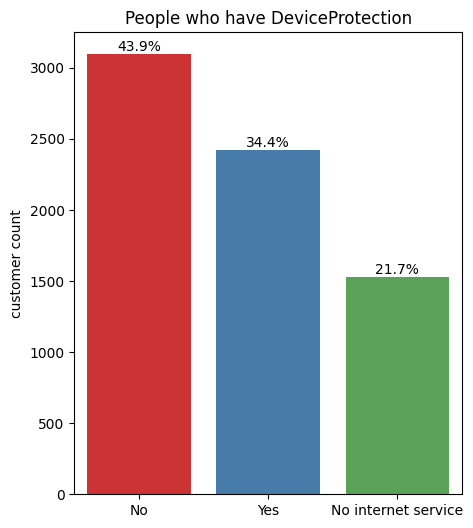

In [17]:
##DEVICE PROTECTION

col = 'DeviceProtection'
plt.figure(figsize=(5,6))
ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)
plt.title(f'People who have {col}')
plt.xlabel('')
plt.ylabel('customer count')
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

/tmp/ipython-input-2146134364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)


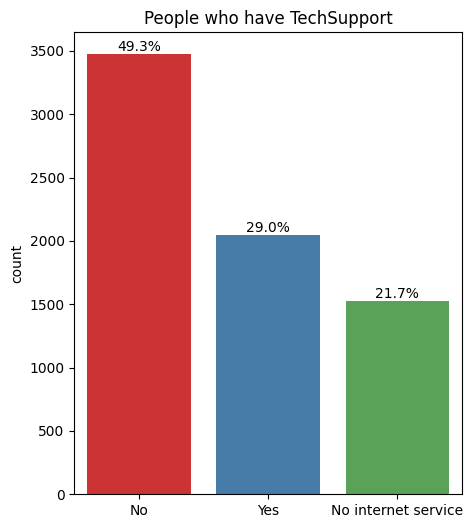

In [18]:
col = 'TechSupport'
plt.figure(figsize=(5,6))
ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)
plt.title(f'People who have {col}')
plt.xlabel('')
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

/tmp/ipython-input-4048519925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)


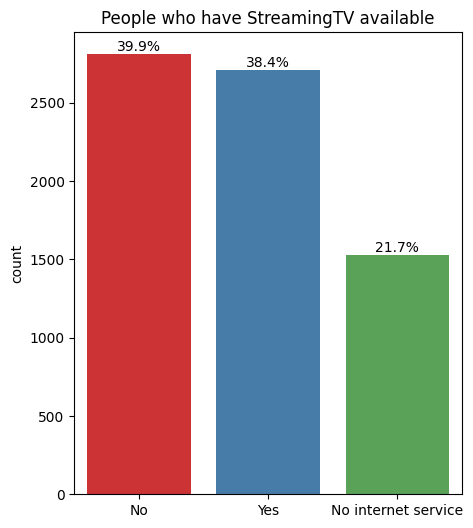

In [19]:
col = 'StreamingTV'
plt.figure(figsize=(5,6))
ax= sns.countplot(data=df, x=col, palette='Set1', order =df[col].value_counts().index)
plt.title(f'People who have {col} available')
plt.xlabel('')
total = len(df[col])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

In [20]:
# columns O–T = index 14 to 19 (0-based indexing)
cols_O_to_T = df.columns[14:20]

print("Selected Columns (O to T):")
print(cols_O_to_T)

df[cols_O_to_T].head()


Selected Columns (O to T):
Index(['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,No,One year,No,Mailed check,56.95,1889.5
2,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,No,Month-to-month,Yes,Electronic check,70.70,151.65


Numeric Column: MonthlyCharges
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


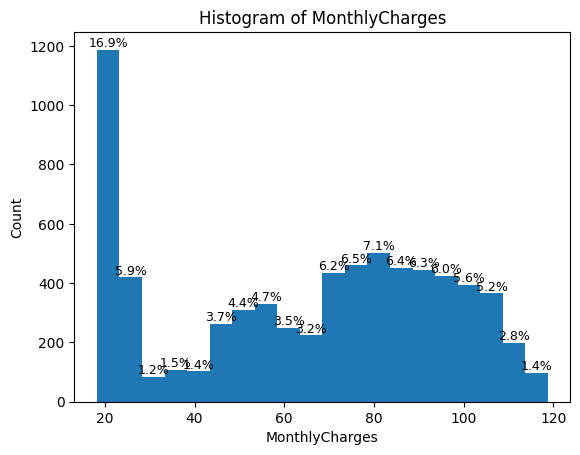

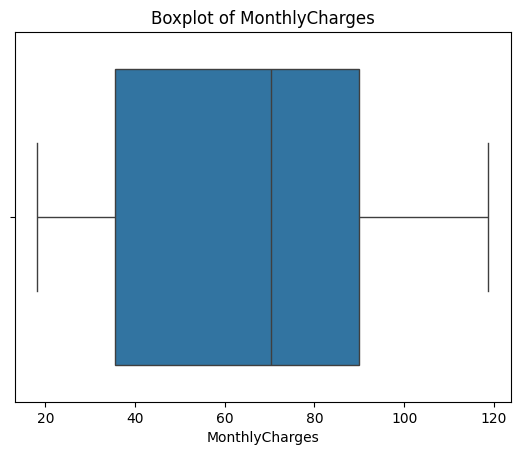

In [21]:
for col in cols_O_to_T:
    if pd.api.types.is_numeric_dtype(df[col]):

        print("Numeric Column:", col)

        print(df[col].describe())

        values = df[col].dropna()

        # Histogram with percentage labels
        plt.figure()
        plt.title(f"Histogram of {col}")

        counts, bins, patches = plt.hist(values, bins=20)

        total = len(values)

        # Add % label on each bar
        for count, patch in zip(counts, patches):
            if count > 0:
                percentage = (count / total) * 100
                x = patch.get_x() + patch.get_width() / 2
                y = patch.get_height()
                plt.text(x, y, f"{percentage:.1f}%",
                         ha='center', va='bottom', fontsize=9)

        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

        # Boxplot
        plt.figure()
        plt.title(f"Boxplot of {col}")
        sns.boxplot(x=values)
        plt.show()


Based on the histogram, the distribution of **MonthlyCharges** is **bimodal**, meaning the customer base consists of **two distinct groups**:

1.  A large group of customers with **very low monthly charges** ($\approx 20$ units).
2.  A second, equally substantial group of customers with **mid-to-high monthly charges** ($\approx 45$ to $110$ units).

**Conclusion:** The presence of these two separate modes indicates that a single average or median charge is **not representative** of the overall customer population, suggesting the need for **segmentation** (e.g., by plan type) for further analysis.

Categorical Column: StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


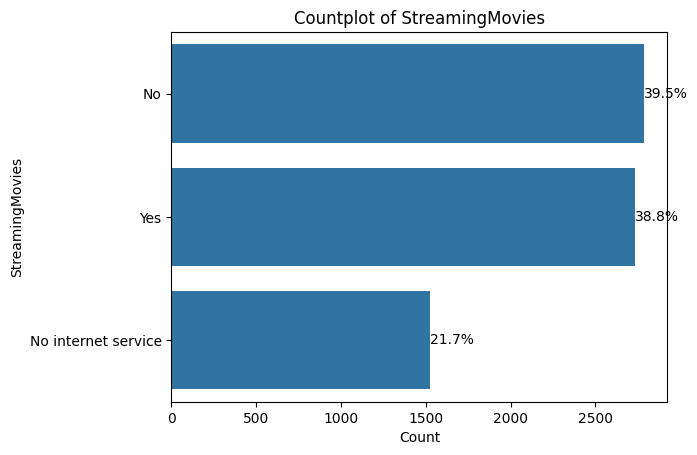

In [22]:
col = "StreamingMovies"


print("Categorical Column:", col)


print(df[col].value_counts())

plt.figure()
plt.title(f"Countplot of {col}")

ax = sns.countplot(y=col, data=df)

total = len(df[col])

for p in ax.patches:
    count = p.get_width()
    percentage = 100 * count / total
    x = p.get_x() + count + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f"{percentage:.1f}%", va='center')

plt.xlabel("Count")
plt.ylabel(col)
plt.show()


Categorical Column: Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


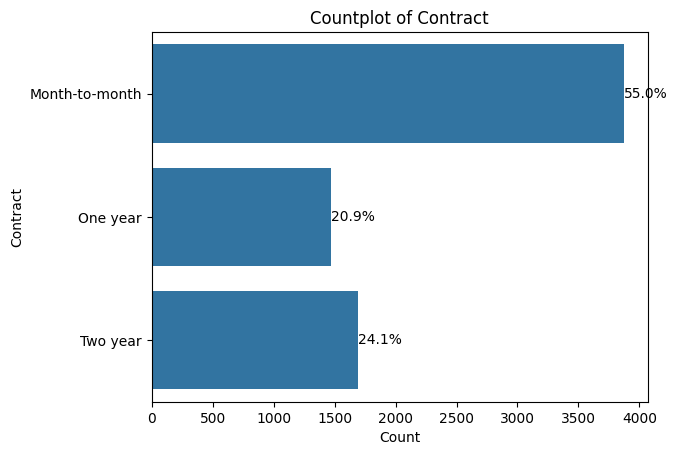

In [23]:
col = "Contract"


print("Categorical Column:", col)

print(df[col].value_counts())

plt.figure()
plt.title(f"Countplot of {col}")

ax = sns.countplot(y=col, data=df)

total = len(df[col])

for p in ax.patches:
    count = p.get_width()
    percentage = 100 * count / total
    x = p.get_x() + count + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f"{percentage:.1f}%", va='center')

plt.xlabel("Count")
plt.ylabel(col)
plt.show()


Categorical Column: PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


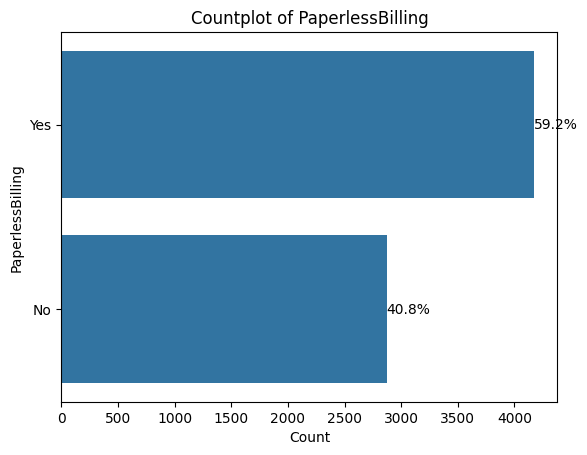

In [24]:
col = "PaperlessBilling"


print("Categorical Column:", col)

print(df[col].value_counts())

plt.figure()
plt.title(f"Countplot of {col}")

ax = sns.countplot(y=col, data=df)

total = len(df[col])

for p in ax.patches:
    count = p.get_width()
    percentage = 100 * count / total
    x = p.get_x() + count + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f"{percentage:.1f}%", va='center')

plt.xlabel("Count")
plt.ylabel(col)
plt.show()


Categorical Column: PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


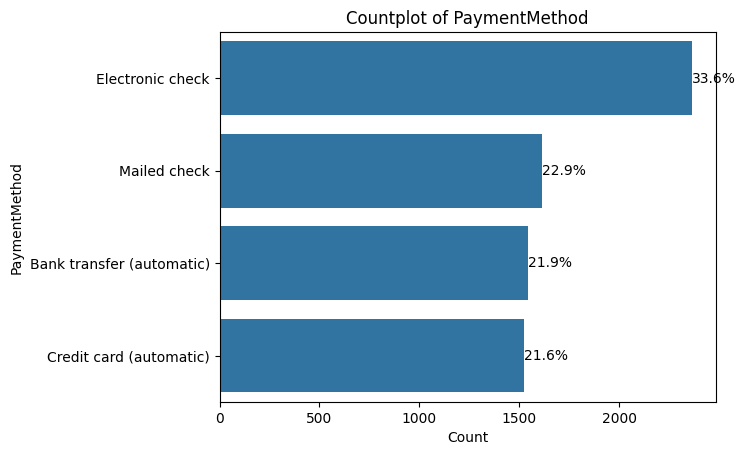

In [25]:
col = "PaymentMethod"


print("Categorical Column:", col)

print(df[col].value_counts())

plt.figure()
plt.title(f"Countplot of {col}")

ax = sns.countplot(y=col, data=df)

total = len(df[col])

for p in ax.patches:
    count = p.get_width()
    percentage = 100 * count / total
    x = p.get_x() + count + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f"{percentage:.1f}%", va='center')

plt.xlabel("Count")
plt.ylabel(col)
plt.show()


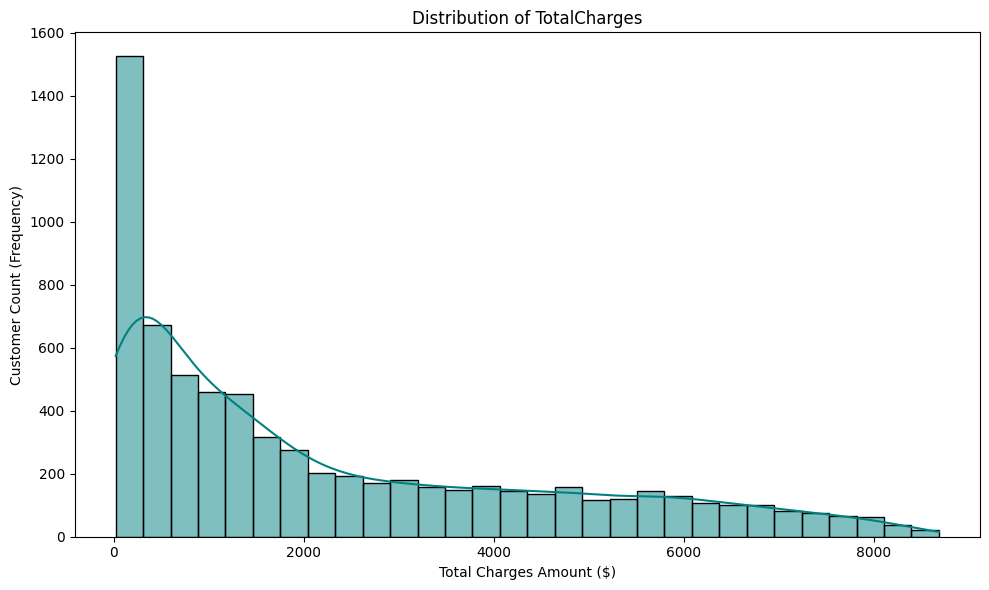

In [26]:

col = "TotalCharges"

# Convert the column to numeric, setting any problematic values (like spaces) to NaN
df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop the few rows that are now NaN (typically new customers with $0 charges)
df_clean = df.dropna(subset=[col]).copy()

# --- 2. Simple Histogram Plot ---
plt.figure(figsize=(10, 6))
plt.title(f"Distribution of {col}")
sns.histplot(data=df_clean, x=col, kde=True, bins=30, color='teal')

plt.xlabel("Total Charges Amount ($)")
plt.ylabel("Customer Count (Frequency)")
plt.tight_layout()
plt.show()

**Bivariate Analysis Results**

--- Churn Rate Analysis for gender ---

Churn Rate by gender (Percentage of Row Total):
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16


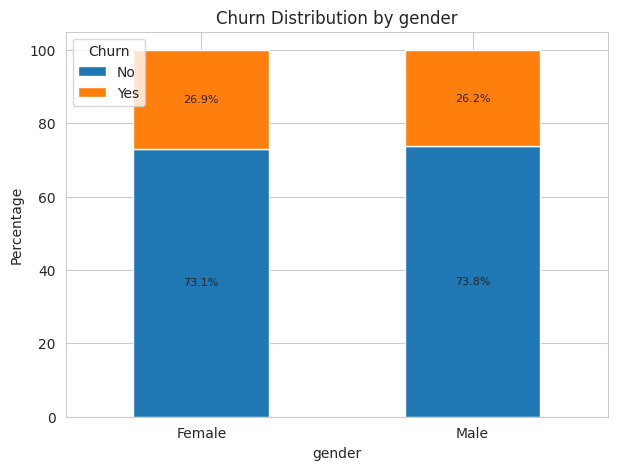

In [27]:

# 1: gender vs. Churn
target_col = 'Churn'
col = 'gender'

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print(f"--- Churn Rate Analysis for {col} ---")

# 1. Create a Crosstab (Contingency Table)
# normalize='index' ensures percentages sum to 100% across the row (i.e., the percentage of Males who Churned)
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(f"\nChurn Rate by {col} (Percentage of Row Total):")
print(crosstab)

# 2. Create a Stacked Bar Chart
# The ax object holds the plot elements
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel(col)
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations for better visibility
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

# Display the plot inline in Colab
plt.show()

Male Churn Rate: 26.16%	Low Importance. This feature has virtually no relationship with churn, as rates are nearly identical for both groups (Male vs. Female).
Female Churn Rate: 26.92%.Low Importance. This feature has virtually no relationship with churn, as rates are nearly identical for both groups (Male vs. Female).


--- Churn Rate by SeniorCitizen ---
Churn             No    Yes
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68


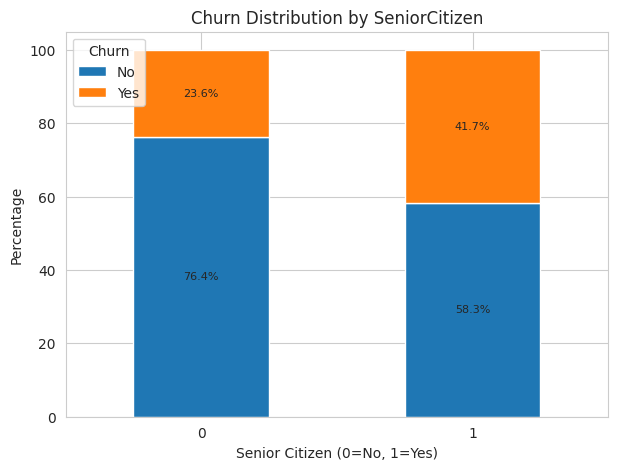

In [28]:
# 2: SeniorCitizen  vs. Churn
col = 'SeniorCitizen'
print(f"\n--- Churn Rate by {col} ---")

# Create Crosstab
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(crosstab)

# Plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.show()

Senior Churn Rate: 41.68%
Non-Senior Churn Rate: 23.61%.HIGH Importance. Senior citizens churn at a significantly higher rate than non-seniors. This feature is a strong indicator of churn risk.


--- Churn Rate by Partner ---
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66


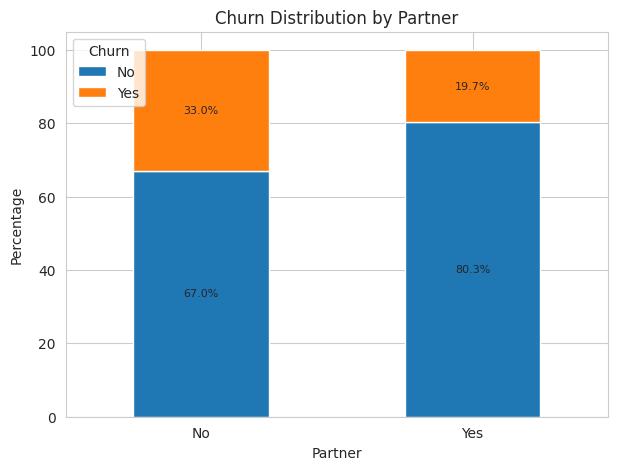

In [29]:
# 3: Partner  vs. Churn
col = 'Partner'
print(f"\n--- Churn Rate by {col} ---")

# Create Crosstab
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(crosstab)

# Plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel(col)
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.show()

No Partner Churn Rate: 32.96%	Yes Partner Churn Rate: 19.66% .HIGH Importance. Customers without a partner are far more likely to churn (33.0%) compared to those with a partner (19.7%).


--- Churn Rate by Dependents ---
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45


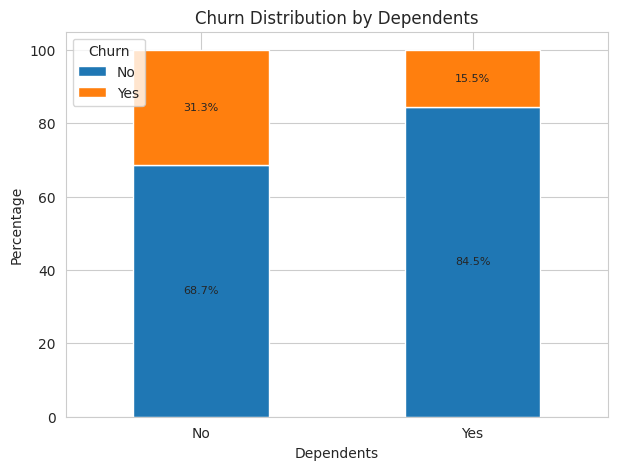

In [30]:
# 4: Dependents vs. Churn
col = 'Dependents'
print(f"\n--- Churn Rate by {col} ---")

# Create Crosstab
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(crosstab)

# Plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel(col)
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.show()

No Dependents Churn Rate: 31.28%	Yes Dependents Churn Rate: 15.45%. HIGH Importance. Customers without dependents are significantly more likely to churn (31.3%) compared to those with dependents (15.5%). Both Partner and Dependents indicate that customers lacking household ties have lower loyalty.


--- Churn Rate by PhoneService ---
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71


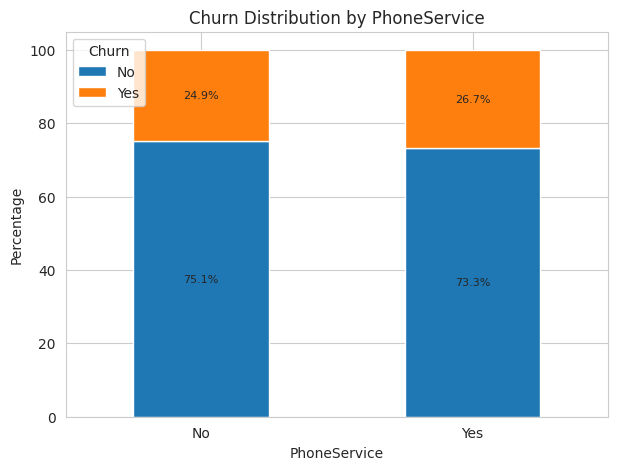

In [31]:
# 5: PhoneService vs. Churn
col = 'PhoneService'
print(f"\n--- Churn Rate by {col} ---")

# Create Crosstab
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(crosstab)

# Plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel(col)
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.show()

Phone Service Churn Rate: 26.71%	No Phone Service Churn Rate: 24.93%. Low Importance. As nearly everyone has phone service, the churn rate difference is negligible.


--- Churn Rate by MultipleLines ---
Churn                No    Yes
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61


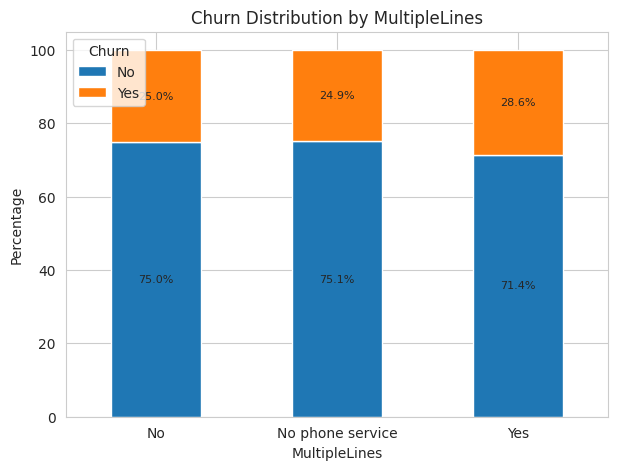

In [32]:
# 6: MultipleLines vs. Churn
col = 'MultipleLines'
print(f"\n--- Churn Rate by {col} ---")

# Create Crosstab
crosstab = pd.crosstab(df[col], df[target_col], normalize='index').round(4) * 100
print(crosstab)

# Plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(7, 5), color=['#1f77b4', '#ff7f0e'])

plt.title(f'Churn Distribution by {col}')
plt.ylabel('Percentage')
plt.xlabel(col)
plt.xticks(rotation=0)
plt.legend(title=target_col, loc='upper left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.show()

Yes Multiple Lines Churn Rate: 28.61%	No Multiple Lines Churn Rate: 25.04%. Moderate Importance. Customers with multiple lines have a slightly elevated churn rate (28.6%) compared to those with a single line (25.0%).

--- Descriptive Statistics for tenure Grouped by Churn ---
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


/tmp/ipython-input-411195532.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=numerical_col, data=df, palette=['#1f77b4', '#ff7f0e']) # Blue for No, Orange for Yes


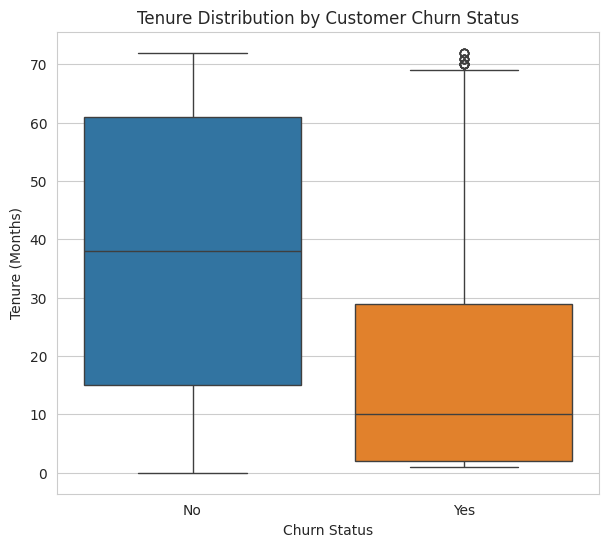

In [33]:
# 7: tenure vs. Churn

target_col = 'Churn'
numerical_col = 'tenure'

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# 1. Descriptive Statistics Grouped by Churn
print(f"--- Descriptive Statistics for {numerical_col} Grouped by {target_col} ---")
churn_stats = df.groupby(target_col)[numerical_col].describe().round(2)
print(churn_stats)

# 2. Box Plot Visualization
plt.figure(figsize=(7, 6))

# Generate the Box Plot
sns.boxplot(x=target_col, y=numerical_col, data=df, palette=['#1f77b4', '#ff7f0e']) # Blue for No, Orange for Yes

plt.title(f'Tenure Distribution by Customer Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')

# Display the plot inline in Colab
plt.show()

Mean Churn Tenure: 17.98 months	Mean Non-Churn Tenure: 37.57 months. CRITICAL Importance. This is the strongest numerical predictor. The Box Plot clearly shows that customers who churn have a far shorter median and mean tenure (18 months) than those who stay (38 months). This confirms the problem is concentrated among new customers.

Feature Analysis Summary: Columns A–H (Demographics & Initial Service)

This note details the univariate (distribution) and bivariate (relationship to 'Churn') analysis for the first eight columns. The target variable for this analysis is 'Churn'.

1**. Univariate Analysis (Distribution and Characteristics)**

The analysis established the distribution for each feature:

A: customerID: Unique identifier. Excluded from statistical modeling.

B: gender: Highly balanced (50/50 split).

C: SeniorCitizen: Imbalanced; seniors make up only ≈16.2% of the base.

D: Partner: Nearly balanced split.

E: Dependents: Imbalanced; ≈70% of customers do not have dependents.

F: tenure: Numerical, CRITICAL. Exhibits a bimodal (U-shaped) distribution with massive spikes at 1 month (new customers) and 72 months (loyal customers). The median tenure is 29.00 months.

G: PhoneService: Highly imbalanced (≈90% have service), limiting its variance.

H: MultipleLines: Well-distributed between 'Yes' (≈42%) and 'No' (≈48%) subscribers.

2.** Bivariate Analysis vs. 'Churn' (Predictive Power)**

This analysis quantifies the relationship between each feature and the target variable, identifying key risk factors:

Primary Risk Predictors (High Importance):

tenure (F): The most critical predictor. Churned customers have a median tenure of only 10.0 months, compared to 38.0 months for non-churners. This confirms that the highest risk of attrition is concentrated among new customers.

SeniorCitizen (C): Senior citizens have a churn rate of 41.7%, nearly double the rate of non-seniors (23.6%).

Partner (D) & Dependents (E): Both indicate that a lack of household ties correlates strongly with churn. Customers without a partner churn at 33.0%, and those without dependents churn at 31.3%.

Secondary Predictors (Moderate/Low Importance):

MultipleLines (H): Shows a moderate elevation in churn for customers with multiple lines (28.6%) compared to those with one line (25.0%).

gender (B) & PhoneService (G): Both show negligible differences in churn rate and should be considered low-value features for modeling.

Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40


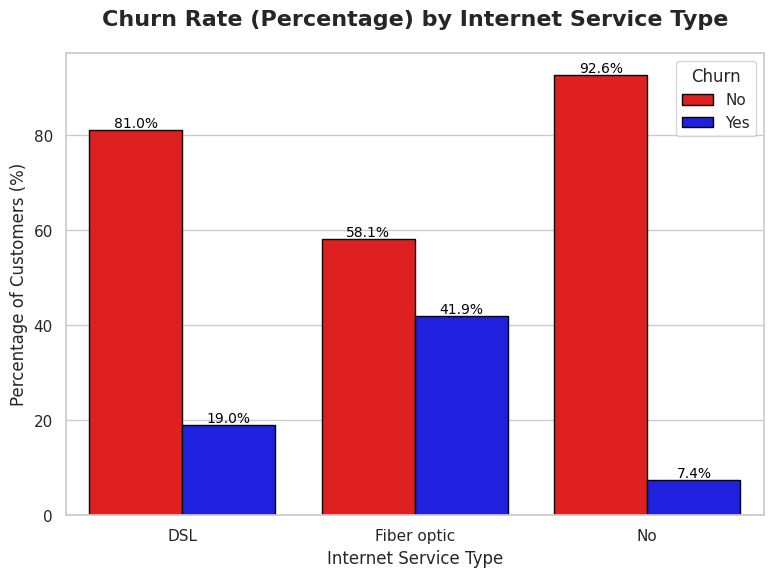

In [34]:
col = 'InternetService'
crosstab = pd.crosstab(df['InternetService'], df['Churn'], normalize='index').round(4) * 100
print(crosstab)
churn_proportions = (
    df.groupby('InternetService')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('proportion')
    .reset_index()
)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))
churn_palette = {'No': 'red', 'Yes': 'blue'}

ax = sns.barplot(
            x=(f'{col}'),
            y='proportion',
            hue='Churn',
            data=churn_proportions,
            palette=churn_palette,
            edgecolor='black'
)
for p in ax.patches:
            height = p.get_height()
            # Only label if the bar segment is large enough to be visible
            if height > 5:
                ax.annotate(
                    f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black'
                )


plt.title('Churn Rate (Percentage) by Internet Service Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)


for p in ax.patches:
    height = p.get_height()

The graph shows clear differences in churn behavior across internet service types. Customers using fiber-optic service have the highest churn rate, with about 41.9% leaving, suggesting possible dissatisfaction with price, reliability, or expectations compared to other options. DSL customers churn far less, at only 19%, indicating greater stability or fewer competitive alternatives. Customers without internet service show the lowest churn at 7.4%, likely because they have minimal engagement with the provider

Churn                   No    Yes
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61


Text(0, 0.5, 'Percentage of Customers (%)')

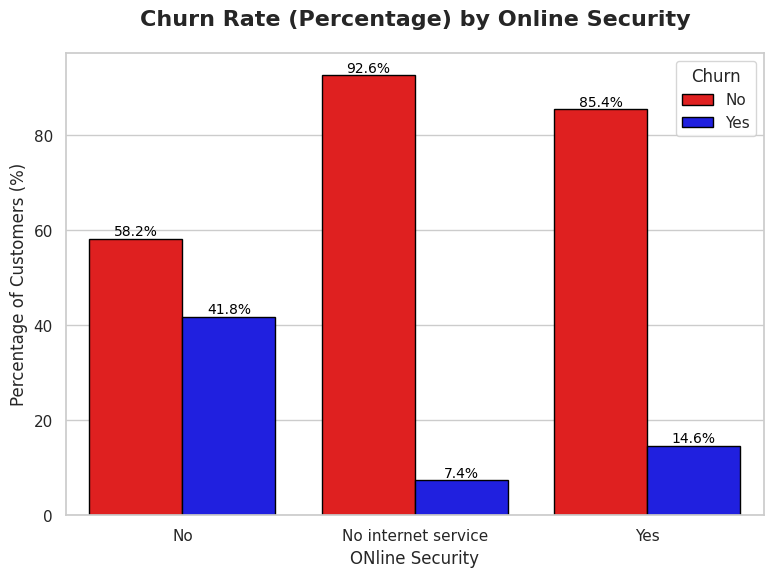

In [35]:
col = 'OnlineSecurity'
crosstab = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index').round(4) * 100
print(crosstab)
churn_proportions = (
    df.groupby('OnlineSecurity')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('proportion')
    .reset_index()
)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))
churn_palette = {'No': 'red', 'Yes': 'blue'}

ax = sns.barplot(
            x=(f'{col}'),
            y='proportion',
            hue='Churn',
            data=churn_proportions,
            palette=churn_palette,
            edgecolor='black'
)
for p in ax.patches:
            height = p.get_height()
            # Only label if the bar segment is large enough to be visible
            if height > 5:
                ax.annotate(
                    f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black'
                )


plt.title('Churn Rate (Percentage) by Online Security', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ONline Security', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)



The graph highlights how online security relates to customer churn. Customers without online security have a relatively high churn rate of 41.8%, suggesting that the lack of protection may contribute to dissatisfaction or vulnerability to switching. Those with online security show a much lower churn rate of 14.6%, indicating that added security features may increase customer loyalty and perceived value. Meanwhile, customers with no internet service show the lowest churn at 7.4%, likely due to limited engagement.

Churn                   No    Yes
DeviceProtection                 
No                   60.87  39.13
No internet service  92.60   7.40
Yes                  77.50  22.50


Text(0, 0.5, 'Percentage of Customers (%)')

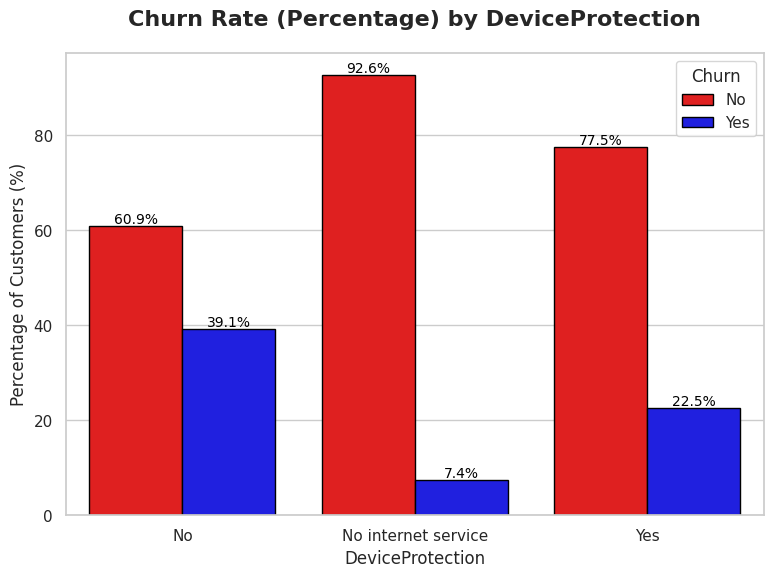

In [36]:
col = 'DeviceProtection'
crosstab = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index').round(4) * 100
print(crosstab)
churn_proportions = (
    df.groupby('DeviceProtection')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('proportion')
    .reset_index()
)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))
churn_palette = {'No': 'red', 'Yes': 'blue'}

ax = sns.barplot(
            x=(f'{col}'),
            y='proportion',
            hue='Churn',
            data=churn_proportions,
            palette=churn_palette,
            edgecolor='black'
)
for p in ax.patches:
            height = p.get_height()
            # Only label if the bar segment is large enough to be visible
            if height > 5:
                ax.annotate(
                    f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black'
                )


plt.title('Churn Rate (Percentage) by DeviceProtection', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('DeviceProtection', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)

The graph shows how device protection relates to customer churn. Customers without device protection have a churn rate of 39.1%, indicating a moderate risk of leaving. Those who do have device protection churn far less, at 22.5%, suggesting that added protection increases satisfaction and loyalty. As in other categories, customers with no internet service again show the lowest churn at 7.4%, reflecting limited engagement rather than true retention.

Churn                   No    Yes
TechSupport                      
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17


Text(0, 0.5, 'Percentage of Customers (%)')

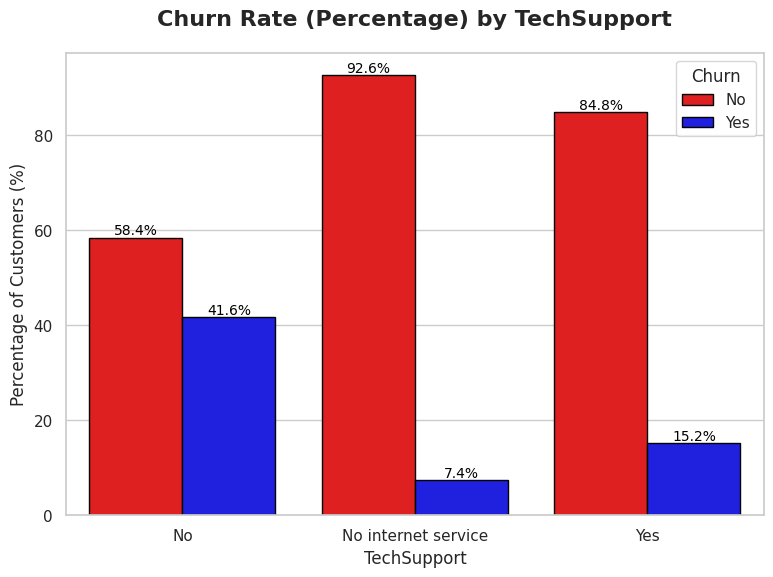

In [37]:
col = 'TechSupport'
crosstab = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index').round(4) * 100
print(crosstab)
churn_proportions = (
    df.groupby('TechSupport')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('proportion')
    .reset_index()
)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))
churn_palette = {'No': 'red', 'Yes': 'blue'}

ax = sns.barplot(
            x=(f'{col}'),
            y='proportion',
            hue='Churn',
            data=churn_proportions,
            palette=churn_palette,
            edgecolor='black'
)
for p in ax.patches:
            height = p.get_height()
            # Only label if the bar segment is large enough to be visible
            if height > 5:
                ax.annotate(
                    f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color='black'
                )


plt.title('Churn Rate (Percentage) by TechSupport', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('TechSupport', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)

The graph shows how customer churn varies based on whether they receive technical support. Customers without internet service have the lowest churn rate, while those with no tech support show the highest churn, indicating that lack of help increases the likelihood of leaving. Customers who do have tech support still churn less than those without it, suggesting that support services help retain customers.

Text(0, 0.5, 'Percentage of Customers (%)')

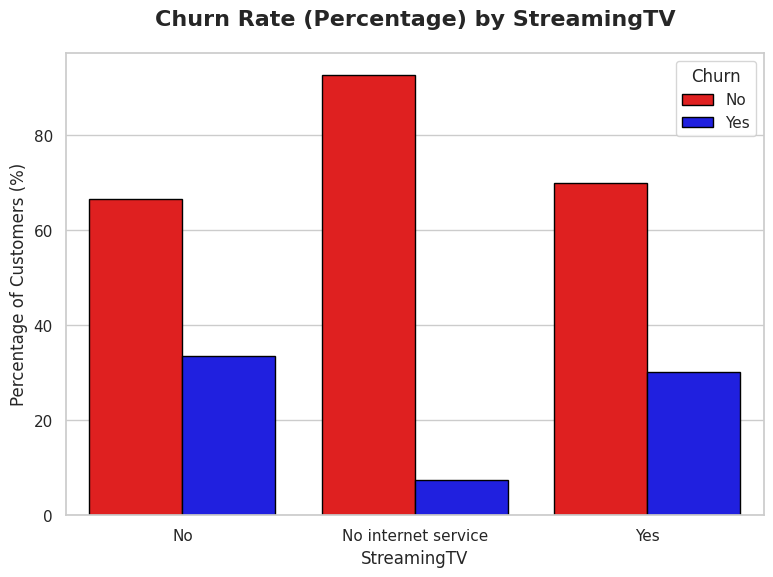

In [38]:
col = 'StreamingTV'
churn_proportions = (
    df.groupby('StreamingTV')['Churn']
    .value_counts(normalize=True)
    .mul(100)
    .rename('proportion')
    .reset_index()
)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 6))
churn_palette = {'No': 'red', 'Yes': 'blue'}

ax = sns.barplot(
            x=(f'{col}'),
            y='proportion',
            hue='Churn',
            data=churn_proportions,
            palette=churn_palette,
            edgecolor='black'
)
for p in ax.patches:
            height = p.get_height()


plt.title('Churn Rate (Percentage) by StreamingTV', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('StreamingTV', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)

The graph shows how customer churn differs based on whether they use the StreamingTV service. Customers with no internet service churn the least, while those who do not subscribe to StreamingTV have a higher churn rate. Customers who use StreamingTV still show a noticeable churn rate, but it is slightly lower than those who do not use the service.


In [39]:
target = "Churn"


Bivariate Analysis: StreamingMovies vs Churn


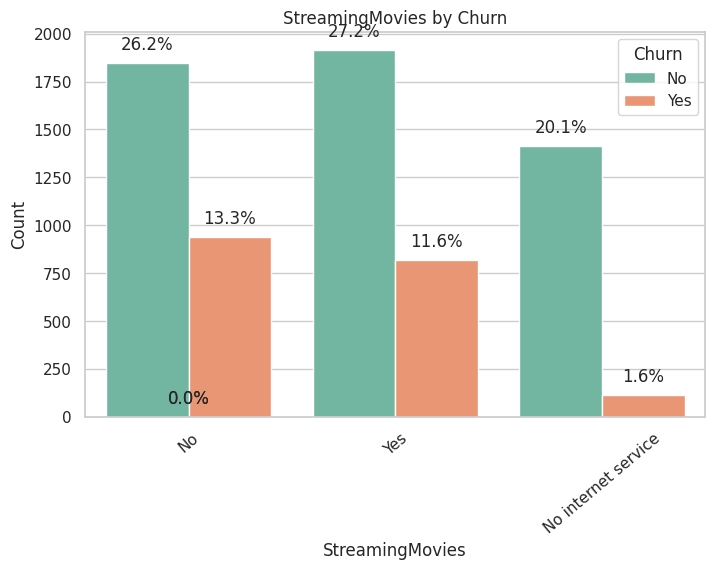

In [40]:
col = "StreamingMovies"


print(f"Bivariate Analysis: {col} vs {target}")

plt.figure(figsize=(8,5))
plt.title(f"{col} by {target}")

ax = sns.countplot(x=col, hue=target, data=df, palette="Set2")

total = len(df)

# Add percentage on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 0.01*total, f'{percentage:.1f}%', ha='center')

plt.xticks(rotation=40)
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


This chart shows the churn distribution based on whether customers subscribe to the Streaming Movies service: No, Yes, or No internet service (meaning they can't have the service).

Customers who do subscribe to StreamingMovies ("Yes") have a higher churn rate (11.6%) compared to those who do not subscribe ("No") who have a churn rate of 13.3%. The highest churn rate among the available service-using groups is actually for customers who are not streaming movies (13.3%). However, the group with No internet service has a negligible churn rate (1.6%). The fact that the churn rates for "Yes" and "No" are relatively close and high suggests that the presence of the StreamingMovies service itself is not the strongest churn predictor among service users.

Bivariate Analysis: Contract vs Churn


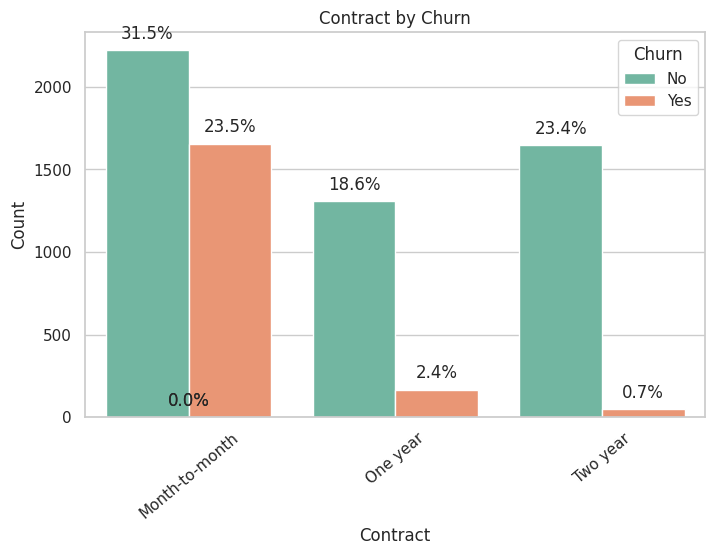

In [41]:
col = "Contract"


print(f"Bivariate Analysis: {col} vs {target}")

plt.figure(figsize=(8,5))
plt.title(f"{col} by {target}")

ax = sns.countplot(x=col, hue=target, data=df, palette="Set2")

total = len(df)

# Add percentage on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 0.01*total, f'{percentage:.1f}%', ha='center')

plt.xticks(rotation=40)
plt.xlabel(col)
plt.ylabel("Count")
plt.show()




This bar chart shows the count of customers who churned ("Yes") versus those who didn't ("No") based on their Contract type: Month-to-month, One year, or Two year. The percentage on top of each bar represents the proportion of the total customer count that falls into that specific category (e.g., 31.5% of all customers are on a month-to-month contract and did not churn).

Customers with Month-to-month contracts have the highest churn rate (represented by the tallest orange 'Yes' bar), accounting for 23.5% of the total customer base who churned. In contrast, customers with longer-term contracts (One year and Two year) have significantly lower churn rates (2.4% and 0.7%, respectively). This indicates a strong inverse relationship between contract duration and churn: shorter commitment leads to higher churn.

Bivariate Analysis: PaperlessBilling vs Churn


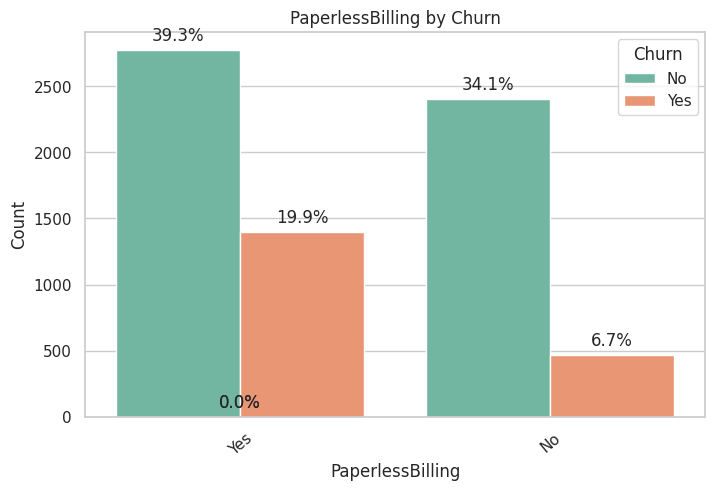

In [42]:
col = "PaperlessBilling"


print(f"Bivariate Analysis: {col} vs {target}")


plt.figure(figsize=(8,5))
plt.title(f"{col} by {target}")

ax = sns.countplot(x=col, hue=target, data=df, palette="Set2")

total = len(df)

# Add percentage on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 0.01*total, f'{percentage:.1f}%', ha='center')

plt.xticks(rotation=40)
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


This bar chart compares the churn count for customers who use Paperless Billing ("Yes") versus those who do not ("No"). Percentages are again displayed above each bar.

Customers who use PaperlessBilling ("Yes") have a substantially higher churn rate, making up 19.9% of the total customer base who churned. Customers who do not use Paperless Billing ("No") have a much lower churn rate, at only 6.7%. This indicates that the churn probability is much higher for customers who opt-in for paperless billing.

Bivariate Analysis: PaymentMethod vs Churn


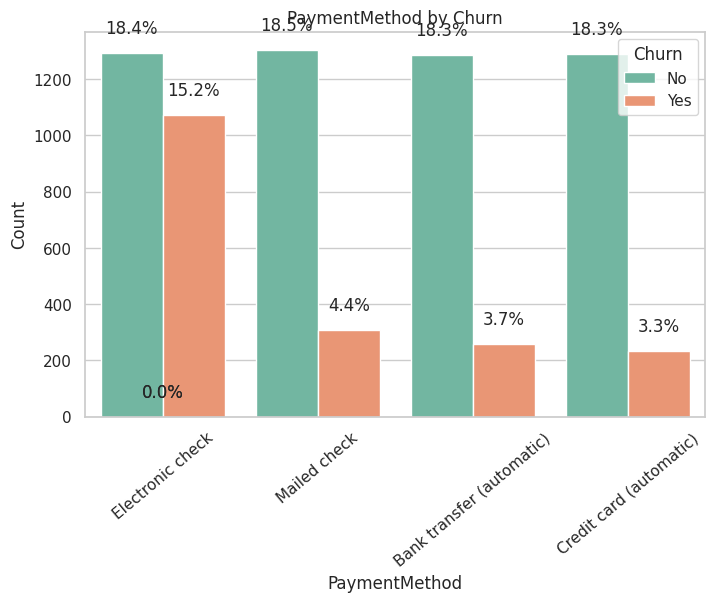

In [43]:
col = "PaymentMethod"


print(f"Bivariate Analysis: {col} vs {target}")

plt.figure(figsize=(8,5))
plt.title(f"{col} by {target}")

ax = sns.countplot(x=col, hue=target, data=df, palette="Set2")

total = len(df)

# Add percentage on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 0.01*total, f'{percentage:.1f}%', ha='center')

plt.xticks(rotation=40)
plt.xlabel(col)
plt.ylabel("Count")
plt.show()


This bar chart displays the count of customers who churned or didn't churn across four different Payment Methods: Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic). The percentages show the breakdown of the total customer base for each Churn/PaymentMethod combination.

The Electronic check payment method is strongly associated with the highest churn rate (15.2% of total customers churned using this method). All other payment methods, especially the automatic options (Bank transfer and Credit card), have substantially lower churn rates (3.7% and 3.3% respectively). This suggests that customers paying via Electronic Check are significantly more likely to churn, while customers using automatic payment methods are the least likely to churn.

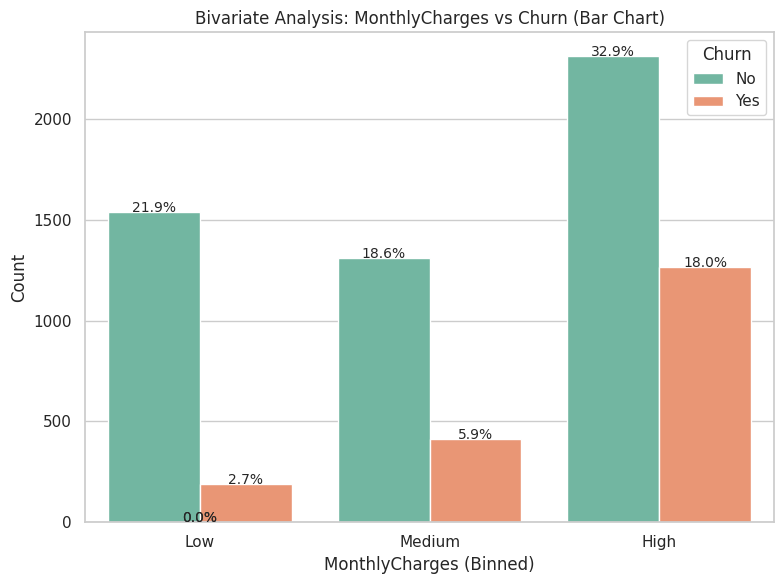

In [44]:

col = "MonthlyCharges"

# 1. Clean TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# 2. Create bins for MonthlyCharges (Low, Medium, High)
df["MonthlyCharges_bin"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0, 35, 70, 120],
    labels=["Low", "Medium", "High"]
)

# 3. Barchart with percentage labels
plt.figure(figsize=(8, 6))
plt.title(f"Bivariate Analysis: {col} vs {target} (Bar Chart)")

ax = sns.countplot(x="MonthlyCharges_bin", hue=target, data=df, palette="Set2")

total = len(df)

# Add % label on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count / total) * 100

    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.text(x, y + 0.5, f"{percentage:.1f}%", ha="center", fontsize=10)

plt.xlabel("MonthlyCharges (Binned)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


This chart groups customers by their Monthly Charges into three bins: Low, Medium, and High, and displays the churn count for each group.

There is a clear positive correlation between MonthlyCharges and churn. Customers with High monthly charges have the highest churn rate (18.0% of all customers who churned belong to this group). Conversely, customers with Low monthly charges have the lowest churn rate (2.7%). This suggests that the higher a customer's monthly bill, the more likely they are to churn.

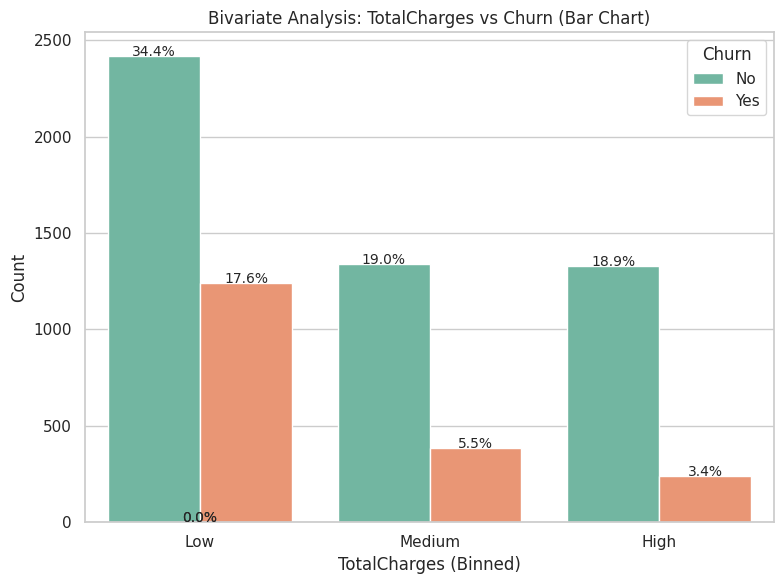

In [45]:
col = "TotalCharges"

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)


# 2. Create bins for TotalCharges (Low, Medium, High)

df["TotalCharges_bin"] = pd.cut(
    df["TotalCharges"],
    bins=[0, 1500, 4000, 8000],
    labels=["Low", "Medium", "High"]
)


# 3. Barchart with % labels
plt.figure(figsize=(8, 6))
plt.title(f"Bivariate Analysis: {col} vs {target} (Bar Chart)")

ax = sns.countplot(
    x="TotalCharges_bin",
    hue=target,
    data=df,
    palette="Set2"
)

total = len(df)

# Add % on each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count / total) * 100

    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.text(
        x, y + 0.5,
        f"{percentage:.1f}%",
        ha='center', fontsize=10
    )

plt.xlabel("TotalCharges (Binned)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


This chart categorizes customers by their cumulative Total Charges into Low, Medium, and High bins, showing the churn count for each.

Customers with Low Total Charges have the highest churn rate (17.6%) compared to the other groups. Conversely, customers with High Total Charges have the lowest churn rate (3.4%). This indicates an inverse relationship between Total Charges and churn. Since higher Total Charges generally correlate with longer customer tenure, this confirms that new or relatively new customers (those with low total charges) are significantly more likely to churn.

In [46]:
from google.colab import files
import os

# Check if the file already exists (optional, but good practice)
FILE_NAME = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
if not os.path.exists(FILE_NAME):
    print("Uploading the Telco Customer Churn dataset...")
    uploaded = files.upload()
    if FILE_NAME in uploaded:
        print(f"File '{FILE_NAME}' uploaded successfully!")
    else:
        print("Upload failed or file not found. Please ensure the file name is correct.")
else:
    print(f"File '{FILE_NAME}' already exists. Skipping upload.")

File 'WA_Fn-UseC_-Telco-Customer-Churn.csv' already exists. Skipping upload.


1. Data Preparation and Missing Values (Fixing



TotalCharges)

2. Outlier Treatment and Feature Reduction

3. Encoding (Label and One-Hot)

4. Feature Engineering and Standardization (Binning and Scaling)

5. Model Detection and Tuning (Baseline and Optimization)





 **Data Preparation and Missing Values**

In [47]:


print(" 1. Data Type Check")
# Show the data type and non-null count
df.info()

print("\n 2. Value Check")
# Show the top 5 most frequent values, including NaN/blanks
print(df['TotalCharges'].value_counts(dropna=False).head(5))

 1. Data Type Check
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          7032 non-null   object  
 1   gender              7032 non-null   object  
 2   SeniorCitizen       7032 non-null   int64   
 3   Partner             7032 non-null   object  
 4   Dependents          7032 non-null   object  
 5   tenure              7032 non-null   int64   
 6   PhoneService        7032 non-null   object  
 7   MultipleLines       7032 non-null   object  
 8   InternetService     7032 non-null   object  
 9   OnlineSecurity      7032 non-null   object  
 10  OnlineBackup        7032 non-null   object  
 11  DeviceProtection    7032 non-null   object  
 12  TechSupport         7032 non-null   object  
 13  StreamingTV         7032 non-null   object  
 14  StreamingMovies     7032 non-null   object  
 15  Contract            703

In [48]:

# Treat Missing Values in 'TotalCharges'
# The column is an object/string type because missing values are stored as ' ' (blank space).
print("Initial 'TotalCharges' Data Type:", df['TotalCharges'].dtype)

# A. Replace blank spaces with standard NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# B. Convert the column to numeric (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# C. Impute NaN values with 0
# These NaN values correspond to customers with 0 tenure (new customers), so TotalCharges is 0.
missing_count = df['TotalCharges'].isnull().sum()
if missing_count > 0:
    df['TotalCharges'].fillna(0, inplace=True)
    print(f"Missing values ({missing_count}) imputed with 0.")
else:
    print("No missing values found in TotalCharges.")

print("Final 'TotalCharges' Data Type:", df['TotalCharges'].dtype)

Initial 'TotalCharges' Data Type: float64
No missing values found in TotalCharges.
Final 'TotalCharges' Data Type: float64


**Outlier Treatment and Initial Feature Reduction**

In [49]:
# Drop the unique identifier as it has no predictive power
df.drop('customerID', axis=1, inplace=True)
print("\nDropped 'customerID' to prevent overfitting.")


Dropped 'customerID' to prevent overfitting.


**Encoding Categorical Variables**

In [50]:
# Encoding Categorical Variables

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

nominal_binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']

df = pd.get_dummies(df, columns=nominal_binary_cols, drop_first=True)

print("\nCompleted One-Hot Encoding for Nominal features (including binary ones).")


Completed One-Hot Encoding for Nominal features (including binary ones).


/tmp/ipython-input-2095016550.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


**Feature Engineering and Standardization**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Tenure Grouping
# Create bins for tenure to capture non-linear relationship with churn.
bins = [0, 12, 24, 48, 60, 72]
labels = ['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years', '5-6 Years']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)

# Encode the new feature
df = pd.get_dummies(df, columns=['Tenure_Group'], drop_first=True)

# Drop the original 'tenure' column
df.drop('tenure', axis=1, inplace=True)
print("Completed Feature Engineering (Tenure Grouping) and dropped original 'tenure'.")


# Standardization/Scaling

# A. Data Splitting (CRUCIAL: Before Scaling to prevent Data Leakage)
X = df.drop('Churn', axis=1)
y = df['Churn']
# Stratify ensures the Churn ratio is preserved in both train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split: X_train shape {X_train.shape}, X_test shape {X_test.shape}")


# B. Standardization (Using StandardScaler)
continuous_cols = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

# Fit scaler ONLY on the training data and transform both sets
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

print("Completed Standardization of continuous features.")

Completed Feature Engineering (Tenure Grouping) and dropped original 'tenure'.

Data split: X_train shape (5625, 24), X_test shape (1407, 24)
Completed Standardization of continuous features.


**Model Detection, Tuning, and Evaluation**

**Logistic Regression**

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt


#  Data Preparation (REQUIRED before modeling)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = df.drop('customerID', axis=1)

# Handle TotalCharges: Convert to numeric, and fill NaN (likely from new customers) with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0) # Corrected line: Removed inplace=True

# Encode target variable 'Churn' (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Feature Handling & Encoding
# Simplify 'No internet service' to 'No'
cols_to_simplify = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_simplify:
    df[col] = df[col].replace('No internet service', 'No')

# One-Hot Encode all categorical features
df_processed = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split Data (using stratification for balanced class representation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization (on continuous features)
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

print("--- Data Preparation Complete. Starting Modeling. ---\n")


#  Logistic Regression

print("1. Logistic Regression Model")

# Initialize and Train the Model
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict and Evaluate
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("\nConfusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)

# [Image of a Confusion Matrix]


roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
print(f"\nROC AUC Score: {roc_auc_log_reg:.4f}")
print("-" * 50)

--- Data Preparation Complete. Starting Modeling. ---

1. Logistic Regression Model
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409


Confusion Matrix:
[[924 111]
 [167 207]]

ROC AUC Score: 0.8426
--------------------------------------------------


**Random Forest Tuning**

In [53]:

# 2. Random Forest Classifier

print("2. Random Forest Classifier (Initial Fit)")

# Initialize and Train the Model (Using standard parameters)
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predict on the Test Set
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\nROC AUC Score: {roc_auc_rf:.4f}")
print("-" * 50)

2. Random Forest Classifier (Initial Fit)
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.55      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409


ROC AUC Score: 0.8452
--------------------------------------------------


In [54]:

# 3. Hyperparameter Tuning (Random Forest using GridSearchCV)

print("3. Hyperparameter Tuning (GridSearch for Random Forest)")

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'class_weight': ['balanced', None]
}

# Use the Random Forest model from Step 2
rf_base = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
# Scoring is set to 'roc_auc' as it's a robust metric for imbalanced classification
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,                 # 5-fold cross-validation
    verbose=1,
    n_jobs=-1             # Use all available cores
)

# Run the Grid Search (This can take a few minutes)
grid_search.fit(X_train, y_train)

# Get the Best Estimator
best_rf = grid_search.best_estimator_

print("\nBest Parameters found by Grid Search:")
print(grid_search.best_params_)



3. Hyperparameter Tuning (GridSearch for Random Forest)
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters found by Grid Search:
{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [55]:

print("\n4. Final Evaluation of Tuned Random Forest Model")
# 4. Final Evaluation of Tuned Random Forest Model
# Predict using the Best Model
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report (Tuned RF):")
print(classification_report(y_test, y_pred_tuned))

roc_auc_tuned = roc_auc_score(y_test, y_proba_tuned)
print(f"\nROC AUC Score (Tuned RF): {roc_auc_tuned:.4f}")
print("-" * 50)


4. Final Evaluation of Tuned Random Forest Model
Classification Report (Tuned RF):
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


ROC AUC Score (Tuned RF): 0.8439
--------------------------------------------------


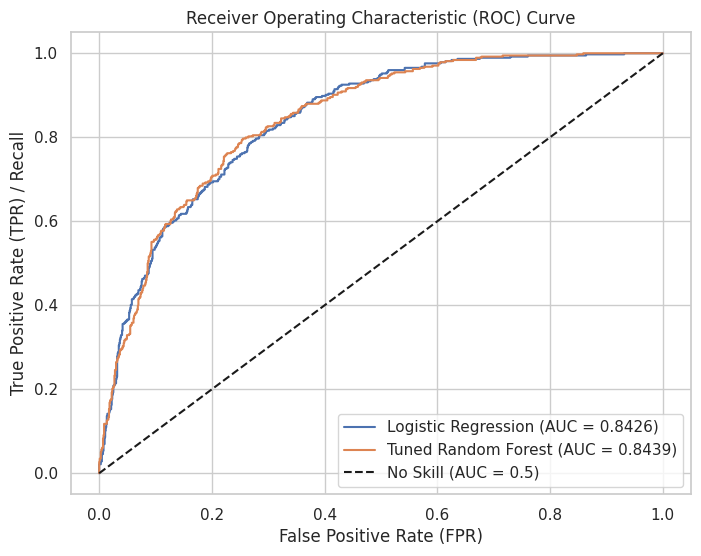

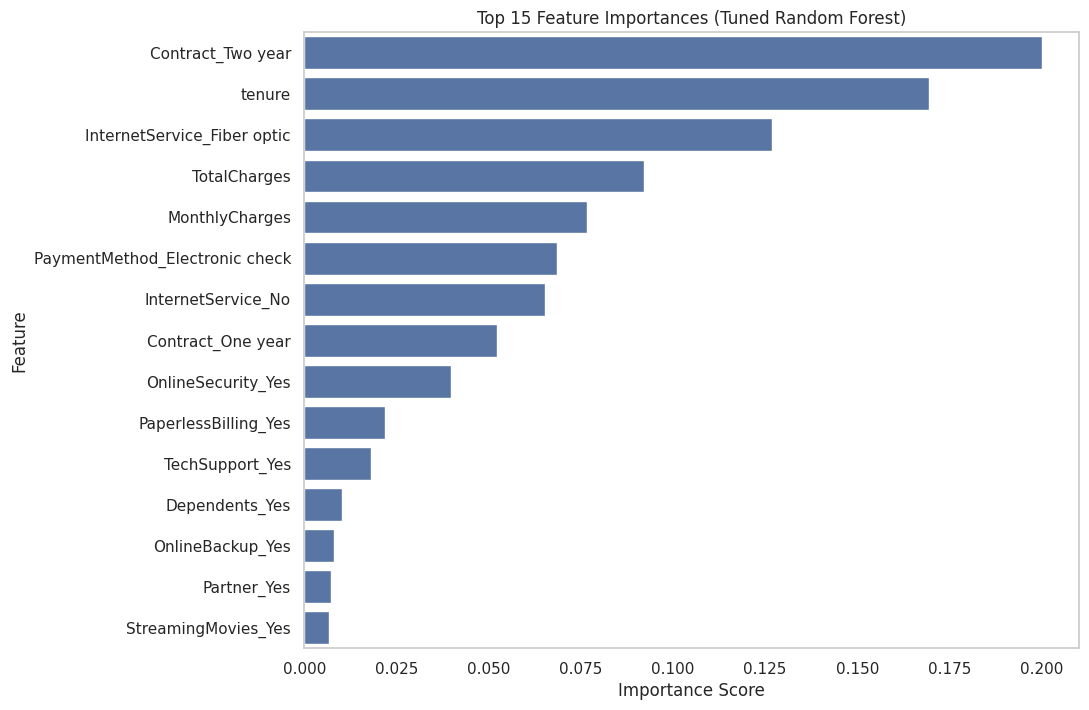

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# ROC Curve Visualization
# Calculate ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_tuned) # Use the tuned RF model

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


# Feature Importance (from Best Random Forest Model)

# Get feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)

# Sort and select top 15 features
top_15_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_features.values, y=top_15_features.index)
plt.title('Top 15 Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

In [57]:
# Imports for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

print("\n--- Starting XGBoost Modeling and Tuning ---")

# Calculate the imbalance ratio (Negative/Positive)
# This helps XGBoost deal with class imbalance by weighting the minority class
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_val = neg_count / pos_count


# 1. XGBoost Classifier


xgb_base = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss', # Use logloss for better compatibility with binary classification
    scale_pos_weight=scale_pos_weight_val
)

# Define Hyperparameter Grid for Tuning
param_grid_xgb = {
    'n_estimators': [100, 200],      # Number of boosting rounds
    'max_depth': [3, 5],             # Maximum depth of the trees
    'learning_rate': [0.05, 0.1]     # Step size shrinkage
}

# Run Grid Search (Optimizing for ROC AUC)
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

print("\nBest Parameters found by Grid Search (XGBoost):")
print(grid_search_xgb.best_params_)


# 2. Final Evaluation of Tuned XGBoost Model

# Predict using the Best Model
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nClassification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"\nROC AUC Score (Tuned XGBoost): {roc_auc_xgb:.4f}")
print("-" * 50)


--- Starting XGBoost Modeling and Tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best Parameters found by Grid Search (XGBoost):
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409


ROC AUC Score (Tuned XGBoost): 0.8454
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


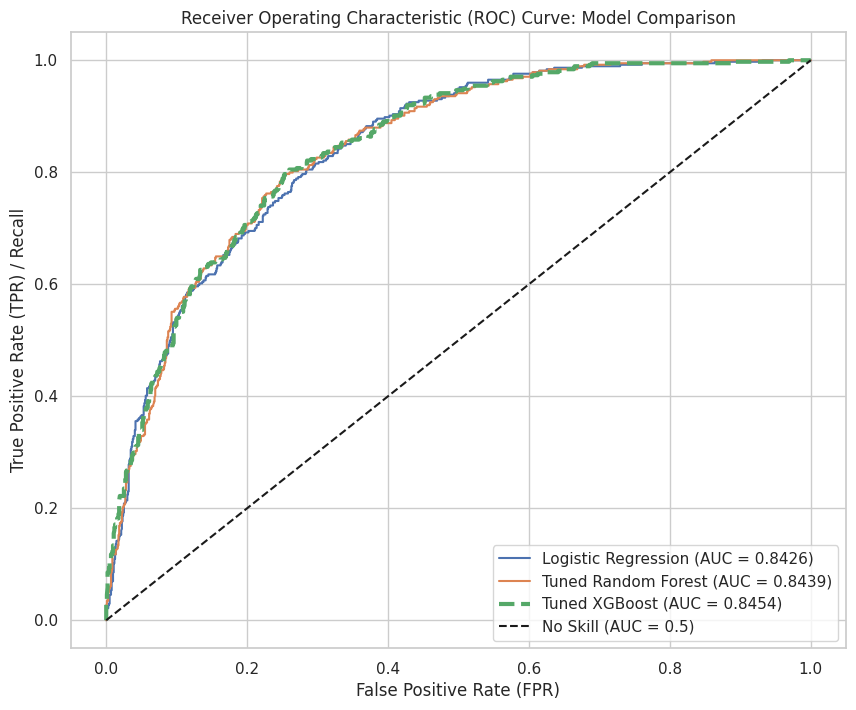

In [58]:
import matplotlib.pyplot as plt


# Calculate ROC curves for all models
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_tuned)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb) # NEW XGBoost Curve

plt.figure(figsize=(10, 8))

# Plot all three models
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Tuned Random Forest (AUC = {roc_auc_tuned:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.4f})', linestyle='--', linewidth=3) # Highlight XGBoost

plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve: Model Comparison')
plt.legend()
plt.grid(True)
plt.savefig('roc_curve_comparison_v2.png')
plt.show()

In [59]:
import joblib
from google.colab import files


# Save Assets for Deployment


# A. Save the Tuned Model (best_rf from GridSearchCV)
MODEL_FILE_NAME = 'telco_churn_model.joblib'
joblib.dump(best_rf, MODEL_FILE_NAME)
print(f"Model saved as {MODEL_FILE_NAME}.")

# B. Save the Fitted Scaler (scaler from StandardScaler)
SCALER_FILE_NAME = 'scaler.joblib'
joblib.dump(scaler, SCALER_FILE_NAME)
print(f"Scaler saved as {SCALER_FILE_NAME}.")

# C. Save the Feature List (X.columns)
FEATURE_FILE_NAME = 'feature_columns.joblib'
feature_cols = X.columns.tolist() # Get the final list of columns
joblib.dump(feature_cols, FEATURE_FILE_NAME)
print(f"Feature list saved as {FEATURE_FILE_NAME}.")


# Programmatically Download the Files (Optional, but useful in Colab)

print("\nInitiating downloads...")
files.download(MODEL_FILE_NAME)
files.download(SCALER_FILE_NAME)
files.download(FEATURE_FILE_NAME)
print("Download complete. Check your browser's download folder.")

Model saved as telco_churn_model.joblib.
Scaler saved as scaler.joblib.
Feature list saved as feature_columns.joblib.

Initiating downloads...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download complete. Check your browser's download folder.


In [60]:
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 1. Load and Clean Data
# Ensure 'WA_Fn-UseC_-Telco-Customer-Churn.csv' is in your current directory
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Drop CustomerID and perform cleaning (as done in typical analysis)
df = df.drop('customerID', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']) # Handle missing TotalCharges
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}) # Convert target to 0/1

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Define Preprocessing Steps

# Identify feature types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure SeniorCitizen (0/1) is treated as categorical for consistency with one-hot encoding
if 'SeniorCitizen' in numerical_cols:
    numerical_cols.remove('SeniorCitizen')
    categorical_cols.append('SeniorCitizen')

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    # OneHotEncoder handles all binary and multi-level categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the ColumnTransformer to apply different steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# 3. Create the Final Pipeline (Preprocessor + Classifier)

# Define the classifier (replace LogisticRegression with your model if needed)
classifier = LogisticRegression(solver='liblinear', random_state=42)

# Combine preprocessor and classifier into a single pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

#  4. Train and Save the Pipeline

# Train the entire pipeline on the full dataset (preprocessing is done internally)
final_pipeline.fit(X, y)

# Save the trained pipeline object to disk
pipeline_file = 'pipeline.pkl'
joblib.dump(final_pipeline, pipeline_file)

print(f"✅ Success! The final pipeline has been saved as '{pipeline_file}'.")

✅ Success! The final pipeline has been saved as 'pipeline.pkl'.


/tmp/ipython-input-3189361298.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}) # Convert target to 0/1
